<a href="https://colab.research.google.com/github/skdmlnatas/business-data/blob/main/Assignment3/Uihwan/ass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [ ]:
if torch.cuda.is_available():   # 많은 양의 연산을 동시에 처리하려고 씀.
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

Using PyTorch version: 2.3.0+cu121  Device: cpu


In [ ]:
BATCH_SIZE = 32
EPOCHS = 10

In [ ]:
train_dataset = datasets.MNIST(root = "../data/MNIST",   # 데이터를 저장할 위치
                               train = True,     #데이터를 학습용으로 사용할 것인가요?
                               download = True,   # (root 위치에) 데이터를 저장할 것인가요?
                               transform = transforms.ToTensor())   # mnist를 저장하자마자 텐서로 전처리

test_dataset = datasets.MNIST(root = "../data/MNIST",
                              train = False,        # download는 이미 저장한 데이터가 있기 때문에 true로 하지 않음. 디폴트가 false인가봄.
                              transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 99803424.21it/s]


Extracting ../data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 13389598.08it/s]

Extracting ../data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden




100%|██████████| 1648877/1648877 [00:00<00:00, 38790560.20it/s]


Extracting ../data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5078786.66it/s]


Extracting ../data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
transform_train = transforms.Compose([ ## Data transformation only for train data
    transforms.Resize(size=(256, 256)), ## Resizing the data into (256, 256)
    transforms.RandomRotation(30), ## 30 degree rotation (data augmentation)  <-- 이게 도대체 무슨 뜻인가요?

    transforms.ToTensor(), ## To 'Pytorch Tensor' -> Pytorch Deep Learning Models like CNN (we'll deal with it later on) get only tensor as an input
])
transform_val = transforms.Compose([ ## Data transformation only for validation (here, it works like the 'test' data...) data
    transforms.Resize(size=(256, 256)), ## Resizing the data into (256, 256)
    transforms.ToTensor() ## To 'Pytorch Tensor'
])

## Please note that the data augmentation technique is not usually implemented to validation/test dataset
## This is why we split transform_train and transform_val -- transform_val does not need
## transforms.RandomRotation(30), ## 30 degree rotation (data augmentation)

train_data = datasets.ImageFolder(root='/content/drive/MyDrive/intro-dl/afhq/train', transform=transform_train)   #여기서 에러가 뜨는데, 혹시 저번 과제가 저장되어있지 않아서 그런건가요?
## Pytorch function datasets.ImageFolder organizes the data in root directory (here, '/content/drive/MyDrive/intro-dl/afhq/train')
## and applies transform_train as defined above.
val_data = datasets.ImageFolder(root='/content/drive/MyDrive/intro-dl/afhq/val', transform=transform_val)
## Pytorch function datasets.ImageFolder organizes the data in root directory (here, '/content/drive/MyDrive/intro-dl/afhq/val')
## and applies transform_val as defined above.

train_loader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle = True)
## Pytorch function DataLoader organizes the 'shuffled' (shuffle = True) data in train_data as defined above with the batch size of 16.
val_loader = torch.utils.data.DataLoader(val_data, batch_size=16, shuffle = True)
## Pytorch function DataLoader organizes the 'shuffled' (shuffle = True) data in val_data as defined above with the batch size of 16.


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/intro-dl/afhq/train'

In [ ]:
train_data.class_to_idx ## It automatically catches the classes in train_data -> check it by yourself!
## (see /content/drive/MyDrive/intro-dl/afhq/val directory in your Google Drive)

NameError: name 'train_data' is not defined

In [ ]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
## brings the next images and labels

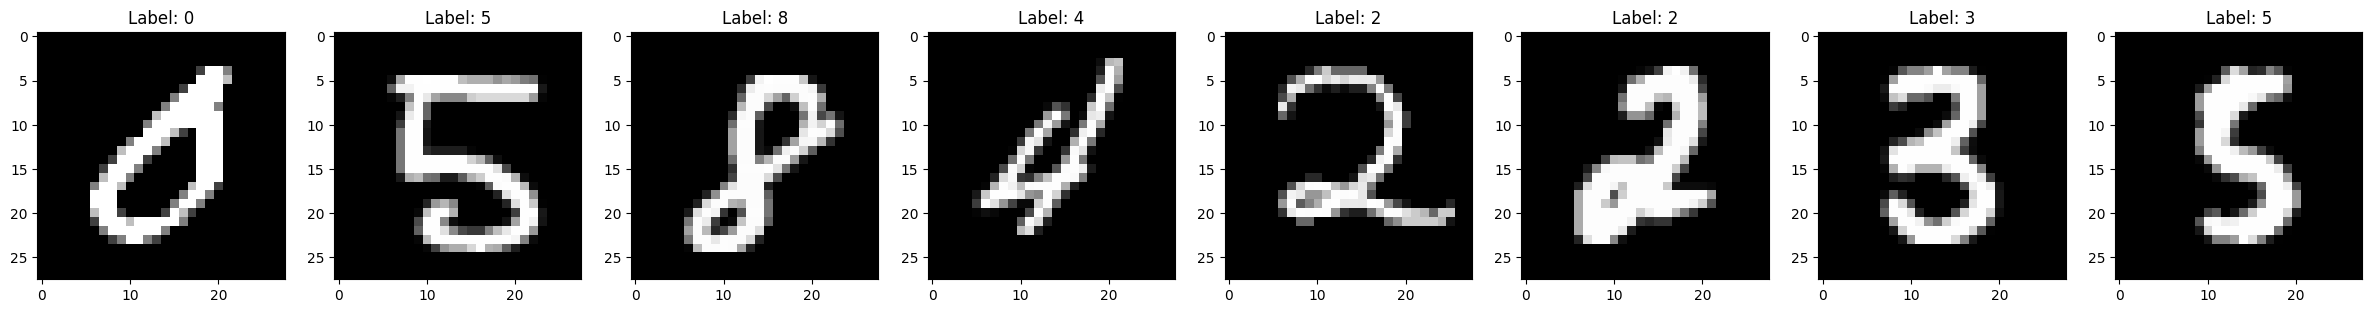

In [ ]:
def show_imgs(imgs, labels, preds=None):
    f, axes= plt.subplots(1, 8, figsize=(30,5))
    for i, axis in enumerate(axes):
        axes[i].imshow(np.squeeze(np.transpose(imgs[i].numpy(), (1, 2, 0))), cmap='gray')
        axes[i].set_title(f'Label: {labels[i].numpy()}')
        if preds != None:
            axes[i].set_xlabel(f'Pred: {np.argmax(preds[i].numpy())}')
    plt.show()

show_imgs(images, labels)

## shows the sample train_data
## 30 degree rotation!

In [ ]:
import os

In [ ]:
train_cat = os.listdir('/content/drive/MyDrive/intro-dl/afhq/train/cat')
train_dog = os.listdir('/content/drive/MyDrive/intro-dl/afhq/train/dog')
train_wild = os.listdir('/content/drive/MyDrive/intro-dl/afhq/train/wild')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/intro-dl/afhq/train/cat'

In [ ]:
# WARNING: DO NOT RUN THIS CODE. IT TAKES TOO LONG TIME TO GET THE RESULT.

train_cat_image = []
train_dog_image = []
train_wild_image = []

train_cat_target = []
train_dog_target = []
train_wild_target = []

for i in range(len(train_cat)):
  image = plt.imread(os.path.join('/content/drive/MyDrive/intro-dl/afhq/train/cat', train_cat[i]))
  train_cat_image.append(image)
  train_cat_target.append(0)

for i in range(len(train_dog)):
  image = plt.imread(os.path.join('/content/drive/MyDrive/intro-dl/afhq/train/dog', train_dog[i]))
  train_dog_image.append(image)
  train_dog_target.append(1)

for i in range(len(train_wild)):
  image = plt.imread(os.path.join('/content/drive/MyDrive/intro-dl/afhq/train/wild', train_wild[i]))
  train_wild_image.append(image)
  train_wild_target.append(2)

Question 1."결합할" 경로를 설정함.

In [ ]:
import torch

In [ ]:
w = torch.tensor(3.0, requires_grad = True) ## requires_grad = True: it saves the gradient

In [ ]:
y = w**3 + 10

In [ ]:
y.backward() ## backward() calculates the derivative

In [ ]:
print(f'Differentiating y by w: {w.grad}') ## check it by yourself!! dy/dw = 3*w^2 ..., so

Differentiating y by w: 27.0


In [ ]:
## Another example with the loss fuction
import torch
import torch.nn as nn

In [ ]:
x = torch.ones(5)  # input
y = torch.zeros(3)  # output

w = torch.randn(5, 3, requires_grad=True) # weight
b = torch.randn(3, requires_grad=True) # bias

In [ ]:
z = torch.matmul(x, w) + b # z = wx + b
loss_fn = nn.MSELoss() # loss function

In [ ]:
loss = loss_fn(z, y)

loss.backward()

In [ ]:
print(f'Differentiating loss by w :\n {w.grad}')
print(f'Differentiating loss by b : {b.grad}')

Differentiating loss by w :
 tensor([[-2.0966,  0.2933,  2.2240],
        [-2.0966,  0.2933,  2.2240],
        [-2.0966,  0.2933,  2.2240],
        [-2.0966,  0.2933,  2.2240],
        [-2.0966,  0.2933,  2.2240]])
Differentiating loss by b : tensor([-2.0966,  0.2933,  2.2240])


순전파: 입력값 들어오면 계산 후 결과값 도출
역전파: 순전파에서 더 나은 결과를 낼 수 있는 방향으로 파라미터 업그레이드.
pytorch에서는 Autograd를 사용

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions
from pylab import rcParams
from sklearn.datasets import make_circles, make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
np.set_printoptions(suppress=True)
zero_one_colourmap = ListedColormap(('white', 'red'))
rcParams['figure.figsize'] = 14, 7
rcParams['axes.facecolor'] = '#383838'

In [ ]:
X, y = make_circles(n_samples = 1000,      # 원 만듦
                    factor=0.85,
                    random_state=2021,
                    noise=0.1)

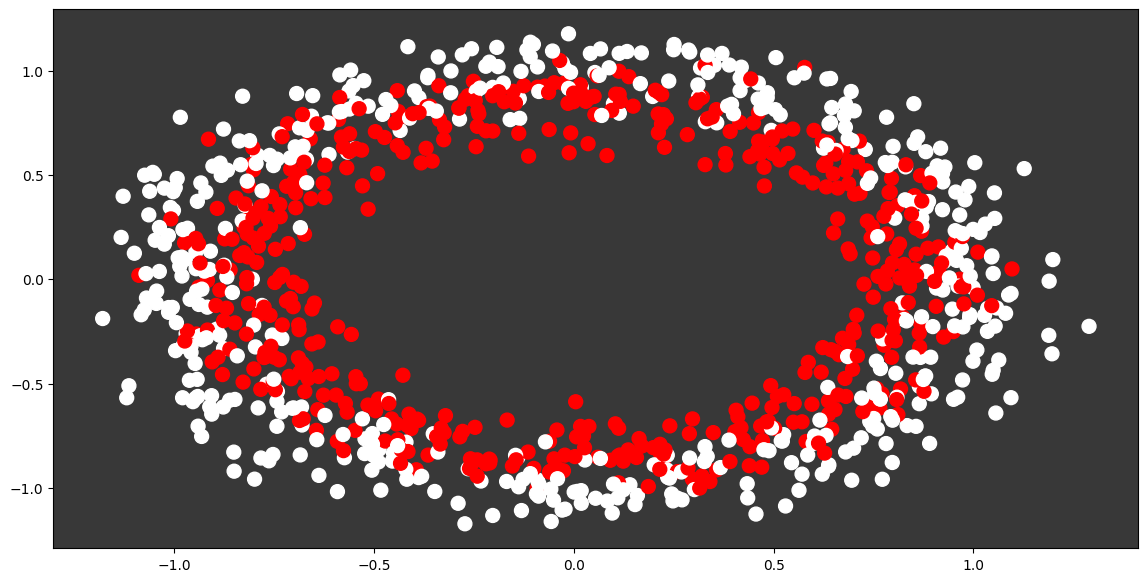

In [ ]:
plt.scatter(X[:,0],X[:,1],     # 그림 그림
            c=y, s=100,
            cmap = zero_one_colourmap)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=42)

In [ ]:
def get_model(inp_activation):     # 모델 만들기
  model = Sequential()
  model.add(Dense(10,input_dim=2, activation=inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(1, activation="sigmoid"))
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [ ]:
def change_in_weight_gradient(old_weight, new_weight, learning_rate):     # weight 변화를 계산하는 함수 만들기
  gradient = (old_weight - new_weight)/ learning_rate
  pct_change_weight = abs(100*(old_weight - new_weight)/ old_weight)
  return gradient, pct_change_weight

In [ ]:
sigmoid_model = get_model("sigmoid")

In [ ]:
sigmoid_model.summary()  # 모델의 구조를 대략 볼 수 있는 함수

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                1

In [ ]:
sigmoid_model_first_layer_weights = sigmoid_model.get_weights()[0][0]

In [ ]:
sigmoid_model_first_layer_weights # [0][0] 가져와서 확인.

array([-0.32138574, -0.4462569 , -0.1321966 , -0.5866814 ,  0.14066732,
       -0.6951143 ,  0.3383736 ,  0.42001122, -0.6493223 ,  0.3414119 ],
      dtype=float32)

In [ ]:
sigmoid_history = sigmoid_model.fit(X_train, y_train, epochs = 1,
                            validation_data = (X_test, y_test))     # validation 데이터를 모델에 적용

21/21 [==============================] - 3s 20ms/step - loss: 0.7609 - accuracy: 0.5119 - val_loss: 0.7660 - val_accuracy: 0.4758


In [ ]:
sigmoid_model_first_layer_weights_updated = sigmoid_model.get_weights()[0][0]

In [ ]:
sigmoid_model_first_layer_weights_updated   # 업데이트 된 파라미터 확인

array([-0.3213872 , -0.44625676, -0.13219438, -0.5866795 ,  0.14066906,
       -0.69511306,  0.33837262,  0.42001206, -0.64932406,  0.3414097 ],
      dtype=float32)

In [ ]:
s_gradient, s_weight_change = change_in_weight_gradient(sigmoid_model_first_layer_weights,
                                                        sigmoid_model_first_layer_weights_updated,
                                                        sigmoid_model.optimizer.get_config()["learning_rate"])   #그레디언트에 따른 파라미터 변화 확인


In [ ]:
s_gradient

array([ 0.00146031, -0.00014901, -0.00222027, -0.00190735, -0.00174344,
       -0.0012517 ,  0.00098348, -0.00083446,  0.00178814,  0.00217557],
      dtype=float32)

In [ ]:
s_weight_change

array([0.00045438, 0.00003339, 0.00167952, 0.00032511, 0.0012394 ,
       0.00018007, 0.00029065, 0.00019868, 0.00027539, 0.00063723],
      dtype=float32)

In [ ]:
activation_model = get_model("relu")   # 엑티베이션 func만 relu로 바꿔서 다

In [ ]:
activation_model_old_first_layer_weight = activation_model.get_weights()[0][0]    #가져와서 확인
activation_model_old_first_layer_weight

array([ 0.08464956,  0.57912856, -0.34335452,  0.00289112,  0.26562834,
       -0.524661  ,  0.23338395, -0.11191607,  0.4280122 , -0.45894527],
      dtype=float32)

In [ ]:
activation_history = activation_model.fit(X_train, y_train, epochs = 1,
                                          validation_data = (X_test, y_test))

21/21 [==============================] - 3s 17ms/step - loss: 0.6935 - accuracy: 0.4701 - val_loss: 0.6932 - val_accuracy: 0.4606


In [ ]:
activation_model_updated_first_layer_weight = activation_model.get_weights()[0][0]

In [ ]:
activation_model_updated_first_layer_weight

array([ 0.09283074,  0.5736742 , -0.3347438 ,  0.00324088,  0.26748478,
       -0.52398556,  0.23808885, -0.10949571,  0.4242662 , -0.46463212],
      dtype=float32)

In [ ]:
relu_gradient, relu_weight_change = change_in_weight_gradient(activation_model_old_first_layer_weight,
                                                              activation_model_updated_first_layer_weight,
                                                              activation_model.optimizer.get_config()["learning_rate"])

In [ ]:
relu_gradient

array([-8.181177 ,  5.454361 , -8.610725 , -0.3497605, -1.8564461,
       -0.6754398, -4.7048926, -2.4203508,  3.7460027,  5.686849 ],
      dtype=float32)

In [ ]:
relu_weight_change

array([ 9.664761  ,  0.94182223,  2.5078235 , 12.097737  ,  0.69888866,
        0.12873833,  2.0159452 ,  2.1626484 ,  0.8752094 ,  1.2391127 ],
      dtype=float32)

In [1]:

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston" ## Loading Boston Housing Dataset -- a famous dataset for linear regression
raw_df = pd.read_csv(data_url, sep="\s+",
           skiprows=22, header=None)

NameError: name 'pd' is not defined

In [3]:
X = np.hstack([raw_df.values[::2, :],
        raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

NameError: name 'raw_df' is not defined

In [ ]:
X


In [ ]:
y


NumPy 라이브러리에서 배열을 결합하는 데 사용되는 함수들.
hastack: 수평으로 배열을 쌓음
vstack: 수직으로
concatenate: 지정된 축을 따라

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

NameError: name 'X' is not defined

X와 y를 각각 트레인과 테스트로 나눔.

In [5]:
reg = linear_model.LinearRegression() ## LR Model of Scikit-learn
reg.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

In [ ]:

# plot for residual error

# setting plot style
plt.style.use('fivethirtyeight')

# plotting residual errors in training data
plt.scatter(reg.predict(X_train),
            reg.predict(X_train) - y_train,
            color="green", s=10,
            label='Train data')

# plotting residual errors in test data
plt.scatter(reg.predict(X_test),
            reg.predict(X_test) - y_test,
            color="blue", s=10,
            label='Test data')

# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)

# plotting legend
plt.legend(loc='upper right')

# plot title
plt.title("Residual errors")

# method call for showing the plot
plt.show()

In [ ]:
## 1. Sigmoid
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.Sigmoid() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [ ]:
## 2. Tanh [Hyperbolic tangent]
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.Tanh() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [ ]:
## 3. ReLU
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.ReLU() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [ ]:
## 4. Leaky ReLU
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.LeakyReLU() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [ ]:
import torch
import torch.nn as nn

class Maxout(nn.Module):
	def __init__(self, in_features, out_features, num_units=2):
		super(Maxout, self).__init__()
		self.num_units = num_units
		self.linear = nn.ModuleList([nn.Linear(in_features, out_features) for _ in range(num_units)])

	def forward(self, x):
		outputs = [layer(x) for layer in self.linear]
		maxout = torch.max(torch.stack(outputs), dim=0)[0]
		return maxout

class DenseBlockMaxout(nn.Module):
	def __init__(self, in_dim, out_dim, num_units=2):
		super(DenseBlockMaxout, self).__init__()
		self.dense = Maxout(in_dim, out_dim, num_units)

	def forward(self, x):
		out = self.dense(x)
		return out

In [ ]:
import torch
import torch.nn as nn

class DenseBlockELU(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlockELU, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.ELU() # ELU activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [ ]:
import torch
import torch.nn as nn

class DenseBlockGELU(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlockGELU, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.GELU() # GELU activation function

	def forward(self, x):
		out = self.act(self.dense(x))
    return out

가우스 누적 분포 함수를 입력에 적용하여 ReLU와 시그모이드 함수의 특성을 원활하게 혼합하는 활성화 함수